In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import mainfile1


In [3]:
dataset= pd.read_csv('crop.csv')
dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            163 non-null    float64
 6   1962            163 non-null    float64
 7   1963            163 non-null    float64
 8   1964            163 non-null    float64
 9   1965            163 non-null    float64
 10  1966            163 non-null    float64
 11  1967            163 non-null    float64
 12  1968            163 non-null    float64
 13  1969            163 non-null    float64
 14  1970            163 non-null    float64
 15  1971            163 non-null    float64
 16  1972            163 non-null    float64
 17  1973            163 non-null    flo

In [4]:
cols_to_remove = ['Country Code', 'Indicator Name','Indicator Code','1960','2022']
data = dataset.drop(cols_to_remove, axis=1)
na=input("enter the name of the country")
val=(data['Country Name'] == na  )# change the name here
j=0
print(val)
for i in val:
    j=j+1
    if i== True:
     print(j-1) 
     new=j

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Name: Country Name, Length: 266, dtype: bool
109


In [5]:
years=[]
prod=[]

for i in range(1961 ,2022,1):
    years.append(i)
    
len(years)    
print(years)

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [8]:
# Append data of a specific row to a list
row_index = new-1  # Index of the row you want to append
row_data = data.loc[row_index].tolist()  # Access the row and convert to list
print("\nData of row", row_index, "appended to a list:")
print(row_data)


Data of row 109 appended to a list:
['India', 24.75, 24.5, 25.22, 25.87, 24.35, 24.11, 26.02, 27.39, 28.38, 30.22, 30.65, 28.9, 31.43, 29.94, 33.5, 32.72, 35.63, 37.19, 34.59, 35.65, 38.38, 37.36, 42.16, 42.75, 43.37, 43.16, 42.38, 47.66, 50.94, 50.88, 53.36, 55.67, 57.02, 58.92, 60.03, 62.35, 63.59, 64.52, 67.45, 65.93, 67.67, 60.9, 68.98, 67.24, 71.18, 75.35, 82.29, 82.79, 79.84, 87.96, 94.29, 95.71, 100.0, 101.28, 97.71, 101.0, 107.38, 110.94, 112.34, 115.75, 120.6, nan]


In [9]:
prod=row_data[1:-1]
len(prod)


61

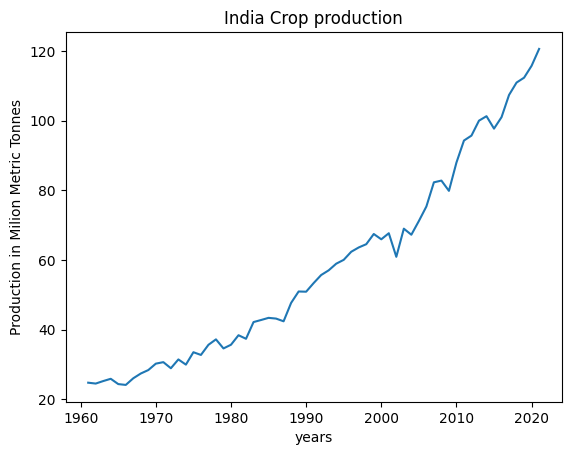

In [10]:
# Create line plot
plt.plot(years, prod)

# Set labels and title
plt.xlabel('years')
plt.ylabel('Production in Milion Metric Tonnes')
plt.title(na+" Crop production")

# Display the plot
plt.show()

In [11]:
prod=np.array(prod, dtype='int64')
years=np.array(years, dtype='int64')
# Reshape the arrays
prod_reshaped = np.array(prod).reshape(-1, 1)
years_reshaped = np.array(years).reshape(-1, 1)


# Create and fit the SVC classifier
clf = SVC(kernel='rbf')
clf.fit(prod_reshaped, years_reshaped)

# Example prediction
pre_reshaped = np.array([prod]).reshape(-1, 1)
ysvc = clf.predict(pre_reshaped)
print(ysvc)

[1966 1966 1964 1964 1966 1966 1967 1968 1972 1971 1971 1972 1973 1974
 1975 1976 1980 1982 1979 1980 1981 1982 1987 1987 1986 1986 1987 1988
 1990 1990 1991 1992 1993 1994 2002 1996 1997 1998 2004 2000 2004 2002
 2003 2004 2005 2006 2008 2008 2009 2010 2011 2012 2013 2016 2015 2016
 2017 2018 2019 2020 2021]


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
pre = []
yearspre = []
diff=2030-2022
for i in range(2022, 2030):
    yearspre.append(i)
    for j in range(1, 12):
        p = []
        p.append(i)
        p.append(j)
    pre.append(p)

In [13]:
clfw = linear_model.LinearRegression()
clfw.fit(prod_reshaped, years_reshaped)
pre_reshaped = np.array(prod_reshaped).reshape(-1, 1)
wpre = clfw.predict(pre_reshaped)
print(wpre)

[[1970.49173524]
 [1970.49173524]
 [1971.10347321]
 [1971.10347321]
 [1970.49173524]
 [1970.49173524]
 [1971.71521118]
 [1972.32694915]
 [1972.93868712]
 [1974.16216307]
 [1974.16216307]
 [1972.93868712]
 [1974.77390104]
 [1973.55042509]
 [1975.99737698]
 [1975.38563901]
 [1977.22085292]
 [1978.44432886]
 [1976.60911495]
 [1977.22085292]
 [1979.05606683]
 [1978.44432886]
 [1981.50301872]
 [1981.50301872]
 [1982.11475669]
 [1982.11475669]
 [1981.50301872]
 [1984.56170857]
 [1986.39692248]
 [1986.39692248]
 [1988.23213639]
 [1989.45561234]
 [1990.67908828]
 [1991.29082625]
 [1992.51430219]
 [1993.73777813]
 [1994.3495161 ]
 [1994.96125407]
 [1996.79646799]
 [1995.57299204]
 [1996.79646799]
 [1992.51430219]
 [1997.40820596]
 [1996.79646799]
 [1999.24341987]
 [2001.69037175]
 [2005.97253755]
 [2005.97253755]
 [2004.13732364]
 [2009.0312274 ]
 [2013.3133932 ]
 [2013.92513117]
 [2016.98382102]
 [2017.59555899]
 [2015.14860711]
 [2017.59555899]
 [2021.26598682]
 [2023.10120073]
 [2024.3246766

In [14]:
print('crop production...')
obj = mainfile1.classify(prod_reshaped, years_reshaped)
obj.split(testpr=0.25)
obj.getbest()

crop production...
[[ 24]
 [ 24]
 [ 25]
 [ 25]
 [ 24]
 [ 24]
 [ 26]
 [ 27]
 [ 28]
 [ 30]
 [ 30]
 [ 28]
 [ 31]
 [ 29]
 [ 33]
 [ 32]
 [ 35]
 [ 37]
 [ 34]
 [ 35]
 [ 38]
 [ 37]
 [ 42]
 [ 42]
 [ 43]
 [ 43]
 [ 42]
 [ 47]
 [ 50]
 [ 50]
 [ 53]
 [ 55]
 [ 57]
 [ 58]
 [ 60]
 [ 62]
 [ 63]
 [ 64]
 [ 67]
 [ 65]
 [ 67]
 [ 60]
 [ 68]
 [ 67]
 [ 71]
 [ 75]
 [ 82]
 [ 82]
 [ 79]
 [ 87]
 [ 94]
 [ 95]
 [100]
 [101]
 [ 97]
 [101]
 [107]
 [110]
 [112]
 [115]
 [120]]
[[1961]
 [1962]
 [1963]
 [1964]
 [1965]
 [1966]
 [1967]
 [1968]
 [1969]
 [1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]]
[[75]
 [24]
 [29]
 [71]
 [26]
 [55]
 [57]
 [28]
 [50]
 [53]
 [37

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarn

In [15]:
import math
print(yearspre)
wpre[-8:]
newpre = [math.modf(item[0])[0] for item in wpre[-8:]]
newpre1= [item * 1000 for item in newpre]
newpre1.reverse()
print(newpre1)

[2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029]
[218.58043853058007, 159.89058448917604, 324.67667206447004, 101.200730447772, 265.986818023066, 595.5589931731993, 148.60710994025794, 595.5589931731993]


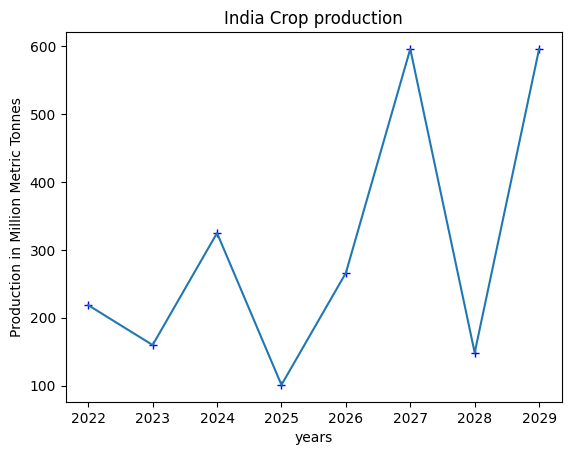

In [16]:
w = plt.plot(yearspre, newpre1, '+', label='Winter', color='b')

# Create line plot
plt.plot(yearspre, newpre1)

# Set labels and title
plt.xlabel('years')
plt.ylabel('Production in Million Metric Tonnes')
plt.title(na+" Crop production")

# Display the plot
plt.show()